In [1]:
using CovidSim_ilm

In [2]:
using StatsBase
using TypedTables

In [3]:
cd("/Users/lewislevin/Dropbox/Online Coursework/Covid/ilm-src")

# Test setup and population matrix

In [4]:
alldict = setup(150, [38015])

Dict{String, Any} with 4 entries:
  "geo"     => 15×10 DataFrame…
  "sp"      => Dict{Symbol, Any}(:touch_factors=>[0.55 0.63 … 0.41 0.35; 0.55 0…
  "dat"     => Dict{String, Dict{Int64, V} where V}("agegrp_idx"=>Dict(38015=>D…
  "dt_dict" => Dict{String, Dict{Int64, V} where V}("lags"=>Dict(5=>[5, 9, 14, …

In [5]:
alldict["dat"]

Dict{String, Dict{Int64, V} where V} with 4 entries:
  "agegrp_idx" => Dict(38015=>Dict(5=>[91898, 91899, 91900, 91901, 91902, 91903…
  "newhistmx"  => Dict{Int64, Array{Int64, N} where N}(38015=>[0 0 … 0 0; 0 0 ……
  "popdat"     => Dict{Int64, Table{NamedTuple{(:status, :agegrp, :cond, :lag, …
  "cumhistmx"  => Dict{Int64, Array{Int64, N} where N}(38015=>[0 0 … 0 0; 0 0 ……

In [6]:
ilmat = alldict["dat"]["popdat"][38015]

Table with 13 columns and 95626 rows:
      status  agegrp  cond  lag  recov_day  dead_day  cluster  vax    vax_day  ⋯
    ┌───────────────────────────────────────────────────────────────────────────
 1  │ 1       1       0     0    0          0         0        false  0        ⋯
 2  │ 1       1       0     0    0          0         0        false  0        ⋯
 3  │ 1       1       0     0    0          0         0        false  0        ⋯
 4  │ 1       1       0     0    0          0         0        false  0        ⋯
 5  │ 1       1       0     0    0          0         0        false  0        ⋯
 6  │ 1       1       0     0    0          0         0        false  0        ⋯
 7  │ 1       1       0     0    0          0         0        false  0        ⋯
 8  │ 1       1       0     0    0          0         0        false  0        ⋯
 9  │ 1       1       0     0    0          0         0        false  0        ⋯
 10 │ 1       1       0     0    0          0         0        false  0

In [7]:
columnnames(ilmat)

(:status, :agegrp, :cond, :lag, :recov_day, :dead_day, :cluster, :vax, :vax_day, :test, :test_day, :quar, :quar_day)

In [8]:
countmap(ilmat.agegrp)

Dict{Int64, Int64} with 5 entries:
  5 => 3729
  4 => 17595
  2 => 25915
  3 => 24385
  1 => 24002

In [9]:
sum(ilmat.status)  # everyone begins as unexposed

95626

In [10]:
geodf = alldict["geo"]   # the date for all locales has been read into a dataframe

,fips,county,city,state,sizecat,pop,density,density_factor
,Int64,String,String,String,Int64,Int64,Int64,Float64
1,6075,San Francisco,San Francisco,CA,2,881549,17255,1.04109
2,53033,Seattle,Seattle,WA,2,2252782,5175,0.931603
3,36061,New York,New York,NY,1,8336817,40306,1.25
4,39035,Cuyahoga,Cleveland,OH,2,1235072,3063,0.912462
5,48113,Dallas,Dallas,TX,2,2635516,4000,0.920954
6,39151,Stark,Canton,OH,3,370606,1688,0.9
7,34013,Essex,Newark,NJ,3,798975,6396,0.942669
8,13089,DeKalb,Atlanta,GA,2,1063937,2708,0.909244
9,17167,Sangamon,Springfield,IL,3,194672,1747,0.900535


In [11]:
density_factor = geodf[geodf[!, :fips] .== 38015, :density_factor][]

0.9042506085245222

In [12]:
alldict["sp"]  # the spread parameters are loaded as a dict of float arrays

Dict{Symbol, Any} with 5 entries:
  :touch_factors   => [0.55 0.63 … 0.41 0.35; 0.55 0.63 … 0.41 0.35; … ; 0.28 0…
  :send_risk       => [0.0, 0.3, 0.65, 0.75, 0.85, 0.85, 0.75, 0.7, 0.65, 0.6  …
  :contact_factors => [1.1 2.1 … 1.7 1.0; 1.1 2.0 … 1.6 0.9; 0.7 1.0 … 0.7 0.6;…
  :recv_risk       => [0.1, 0.39, 0.44, 0.54, 0.56]
  :shape           => 1.0

In [13]:
alldict["dt_dict"]["dt"] # the decision trees for all age groups are loaded

Dict{Int64, OrderedCollections.OrderedDict{Any, Any}} with 5 entries:
  5 => OrderedCollections.OrderedDict((25, 8)=>Dict{String, Vector{T} where T}(…
  4 => OrderedCollections.OrderedDict((25, 8)=>Dict{String, Vector{T} where T}(…
  2 => OrderedCollections.OrderedDict((25, 8)=>Dict{String, Vector{T} where T}(…
  3 => OrderedCollections.OrderedDict((25, 8)=>Dict{String, Vector{T} where T}(…
  1 => OrderedCollections.OrderedDict((25, 8)=>Dict{String, Vector{T} where T}(…

In [14]:
alldict["dt_dict"]["decpoints"]  # the decpoints for all agegrps are loaded as array of day values

Dict{Int64, Vector{Int64}} with 5 entries:
  5 => [5, 9, 14, 25, 19]
  4 => [5, 9, 14, 25, 19]
  2 => [5, 9, 14, 25, 19]
  3 => [5, 9, 14, 25, 19]
  1 => [5, 9, 14, 25, 19]

# Create a seed case

In [15]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 1, nil, agegrps)

(::CovidSim_ilm.var"#scase#59"{Int64, Vector{Int64}, Int64, Int64, Vector{Int64}}) (generic function with 1 method)

# Run a simulation

In [16]:
result_dict, env, series = run_a_sim(180, 38015, showr0=false, silent=true, spreadcases=[], runcases=[seed_1_6]);

*** seed day 1 locale 38015....
(sprtime, trtime, histtime) = (1.4058978580000001, 0.7320670309999995, 0.5758038779999999)


In [17]:
result_dict

Dict{String, Any} with 4 entries:
  "geo"     => 15×10 DataFrame…
  "sp"      => Dict{Symbol, Any}(:touch_factors=>[0.55 0.63 … 0.41 0.35; 0.55 0…
  "dat"     => Dict{String, Dict{Int64, V} where V}("agegrp_idx"=>Dict(38015=>D…
  "dt_dict" => Dict{String, Dict{Int64, V} where V}("lags"=>Dict(5=>[5, 9, 14, …

In [18]:
virus_outcome(series, 38015)

Dict{String, Float64} with 4 entries:
  "unexposed"  => 0.421499
  "infectious" => 0.0
  "dead"       => 0.011328
  "recovered"  => 0.988761

# Plotted results

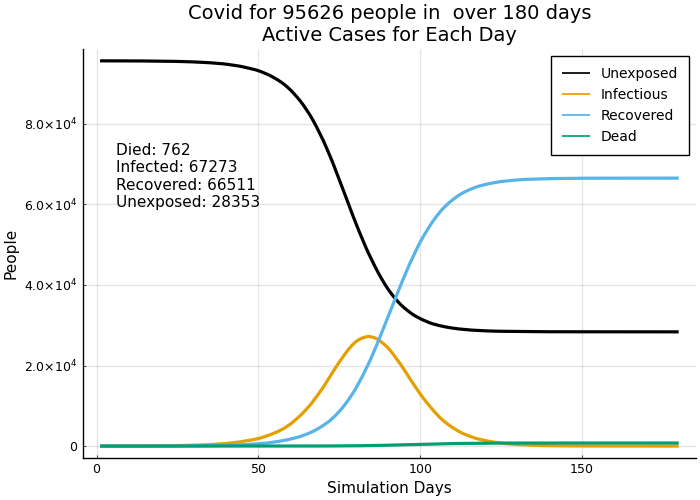

In [19]:
cumplot(series, 38015)

Note that the orangle line labeled Infectious that shows the number of infected people is *not* what you see in newspaper accounts. In this plot Infectious shows the net infected people: Some people got sick today. Some people get better: they're not infectious any more--they recovered and are on the blue line. Sadly, some people died--they're not infectious either--they're dead and are on the green line. Newspaper tracking shows the new active infections of each day--who got sick today? The next day, if no one new got sick the line would be at zero--even though the people who got sick aren't better yet. So, the newspaper line goes up and down faster. Yet another approach is to show the cumulative number of infected people: This keeps going up until no one new gets infected--then the line is high but levels off. This is the least common way to show the data.